# Simple Linear Regression

In [33]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

### Read in the data

In [34]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('Bitcoin_hourly_output.csv')

In [35]:
df = df.iloc[1:,:]
df = df.iloc[::-1]
#df['hour'] = pd.to_datetime(df['hour'])
#df.set_index('hour', inplace=True)
df.tail()

,hour,open,close,high,low,volumeCoin,volumeUSD,sentiment
5,2018-07-24 03,7973.02,7978.74,8002.16,7939.17,4526.69,36201268.80,0.294731
4,2018-07-24 04,7978.74,8011.39,8030.02,7977.80,4887.32,39184720.44,0.314674
3,2018-07-24 05,8011.41,7990.62,8021.65,7963.96,3908.02,31286378.78,0.266359
2,2018-07-24 06,7990.88,8014.66,8027.84,7980.12,4255.12,34107522.92,0.233295
1,2018-07-24 07,8014.66,8131.77,8132.42,8007.94,7224.82,58462940.02,0.259952


In [36]:
df = df.drop(['hour'], axis=1)
X = df[[col for col in df.columns if col !='close']]
y = df[["close"]]
df

,open,close,high,low,volumeCoin,volumeUSD,sentiment
301,6375.24,6380.98,6390.48,6363.56,1208.06,7.777067e+06,0.327867
300,6380.98,6394.36,6396.41,6378.70,1391.16,8.940654e+06,0.276738
299,6394.36,6380.65,6394.93,6368.83,2531.03,1.623002e+07,0.260592
298,6380.65,6346.36,6382.71,6346.07,1982.19,1.269522e+07,0.240045
297,6346.36,6343.99,6356.45,6319.10,2057.78,1.307762e+07,0.276091
296,6343.99,6359.09,6360.86,6342.23,897.82,5.749807e+06,0.271889
295,6359.67,6347.94,6362.39,6338.79,1021.31,6.544094e+06,0.274797
294,6348.04,6340.93,6348.42,6315.71,1119.58,7.150597e+06,0.324569
293,6340.87,6227.43,6345.24,6205.65,8625.26,5.384891e+07,0.281495
292,6227.43,6190.11,6233.46,6167.51,4634.39,2.878214e+07,0.286606


### Split data into training set and temp set

In [29]:
#split data into training set and a temp set
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2,random_state=23)

X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5,random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances  {}, Training features  {}".format(X_train.shape[0],X_train.shape[1]))     
print("Validation instances {}, Validation features {}".format(X_val.shape[0],X_val.shape[1]))
print("Testing instances {}, Testing features {}".format(X_test.shape[0],X_test.shape[1]))

Training instances  240, Training features  6
Validation instances 31, Validation features 6
Testing instances 30, Testing features 6


### Use Linear Regression Object

In [30]:
# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.9991107752714687

### Find Coefficient and Intercept

In [31]:
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

Coefficient: 
 [[-3.97925065e-01  6.97359834e-01  7.10887940e-01  3.78487490e-02
  -5.16052292e-06 -6.28498572e+00]]
Intercept: 
 [-71.68669332]


### Predict Output

In [32]:
#Predict Output
y_train_predict = linear.predict(X_train)
y_test_predict = linear.predict(X_test)


### Visualization

In [38]:
# Plot to visualise
import matplotlib.pyplot as plt

def PlotResult(y_train, y_test, y_train_predict, y_test_predict, test_len, name):
        
        #Visualise
        plt.figure(figsize=(12, 5))
        plt.plot(y_train_predict,color='red')
        
        plt.plot(range(train_len, train_len+len(y_test)),
                 y_test_predict,
                 label='Predicted average price',
                 color='red',linestyle = '--')
        
        plt.plot(np.array((y_train).append(y_test)),
                 label='Actual average price',
                 color='green')
        
        plt.axvspan(len(y_train), len(y_train)+len(y_test),
                    alpha=0.3, color='lightgrey')
        
        plt.grid(True)
        plt.axis('tight')
        plt.legend(loc="best")
        plt.title('Predicting the mean BTC price with {}'.format(name))

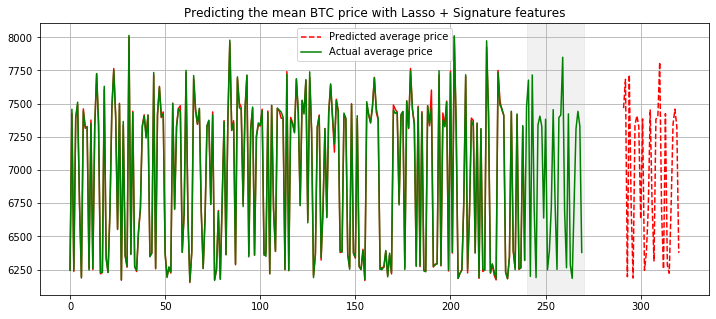

In [39]:
PlotResult(y_train, y_test, y_train_predict, y_test_predict, test_len, 'Linear Regression')